In [1]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size
#text generation apostrpphe breaking

In [2]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account
import os
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/Eis4Elephant/Desktop/key.json'

client = language.LanguageServiceClient()

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


In [4]:
import os
cwd = os.getcwd()
print (cwd)

/Users/Eis4Elephant/Documents/text_generator/Model


In [5]:
tweet_data=pd.read_csv('../Load_Tweets/data/tweet_data.csv')

In [138]:
pre_election_data=pd.read_excel('../Load_Tweets/Pre_election.xlsx')

In [141]:
pre_election_data

,text,created_at
0,Today we are going to win the great state of MICHIGAN and we are going to WIN back the White House! Thank you MI!… https://t.co/onRpEvzHrW,2016-11-08 06:42:36
1,Unbelievable evening in New Hampshire - THANK YOU! Flying to Grand Rapids Michigan now. Watch NH rally here:… https://t.co/hP88anrfgk,2016-11-08 03:43:54
2,Big news to share in New Hampshire tonight! Polls looking great! See you soon.,2016-11-08 00:17:57
3,Today in Florida I pledged to stand with the people of Cuba and Venezuela in their fight against oppression- cont: https://t.co/8eELqk2wUw,2016-11-08 00:16:15
4,Thank you Pennsylvania! Going to New Hampshire now and on to Michigan. Watch PA rally here: https://t.co/d29DLINGst… https://t.co/zcH9crFIKM,2016-11-08 00:08:28
5,LIVE on #Periscope: Join me for a few minutes in Pennsylvania. Get out &amp; VOTE tomorrow. LETS #MAGA!! https://t.co/Ej0LmMK3YU,2016-11-07 23:28:48
6,Hey Missouri let's defeat Crooked Hillary &amp; @koster4missouri! Koster supports Obamacare &amp; amnesty! Vote outsider Navy SEAL @EricGreitens!,2016-11-07 22:21:53
7,'America must decide between failed policies or fresh perspective a corrupt system or an outsider'https://t.co/ll8QIW9SqW,2016-11-07 21:37:25
8,'What I Like About Trump ... and Why You Need to Vote for Him'https://t.co/6rVuDUehZq,2016-11-07 21:35:14
9,'Why Trump' https://t.co/RpwIYB7aOV,2016-11-07 21:32:26


In [6]:
tweet_text = tweet_data['TEXT']

In [7]:
tweet_text[1]

'Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!'

In [8]:
tweet_text_all = tweet_data['TEXT'].str.cat(sep=' ')

In [111]:
analysis_df=pd.DataFrame(columns=['text', 'sentiment', 'magnitude'])

# The text to analyze

for tweet in tweet_text[1311:2000]:
    
    text = tweet
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)


    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    d={'text':text, 'sentiment': sentiment.score, 'magnitude': sentiment.magnitude}
    analysis_df=analysis_df.append(d, ignore_index=True)
#     print('Text: {}'.format(text))
#     print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

ResourceExhausted: 429 Quota exceeded for quota metric 'language.googleapis.com/default_requests' and limit 'DefaultRequestsPerMinutePerProject' of service 'language.googleapis.com' for consumer 'project_number:715179764614'.

,text,sentiment,magnitude
0,"'As Senator Clinton promised 200,000 jobs in Upstate New York - her efforts fell flat.' [URL] [URL]",0.0,0.1
1,Many people are saying that the Iranians killed the scientist who helped the U.S. because of Hillary Clinton's hacked emails.,-0.4,0.4
2,Thank you Newt! [URL],0.1,0.2
3,Thank you Congressman Steven Palazzo! [URL] [URL],0.2,0.4
4,Thank you Senator David Perdue![URL] [URL],0.0,0.0
5,Thank you @RepLouBarletta![URL] [URL],0.2,0.2
6,Thank you @NFIB- together we will #MakeAmericaGreatAgain! [URL],0.1,0.3
7,Thank you! [URL],0.1,0.2
8,Thank you Alex! [URL],0.0,0.1
9,"RT @NFIB: .@NFIB encouraged by @realDonaldTrump’s #taxplan, says #smallbiz would benefit from lower tax rate: [URL]",-0.2,0.2


In [99]:
analysis_df[analysis_df['sentiment'].astype('float') >(0.8)]

,text,sentiment,magnitude
24,Debate polls look great - thank you!#MAGA #AmericaFirst [URL],0.8,0.8
27,Thank you for all of the great comments on the debate last night. Very exciting!,0.8,1.7
39,RT @DanScavino: WE LOVE OUR DEPLORABLES!!!#TrumpTrain #Debates2016 [URL],0.8,0.8
45,"In my administration, EVERY American will be treated equally, protected equally, and honored equally #Debate #BigLeagueTruth",0.9,0.9
100,Certainly has been an interesting 24 hours!,0.8,0.8
161,".@mike_pence is doing a great job - so far, no contest!",0.9,0.9
170,"""@lainey34210: @realDonaldTrump Great opening Pence💕""",0.8,0.8
174,Here we go - Enjoy!,0.9,0.9
189,"Melania and I extend our warmest greetings to those observing Rosh Hashanah here in the United States, in Israel, and around the world.",0.8,0.8
247,Great debate poll numbers - I will be on @foxandfriends at 7:00 to discuss. Enjoy!,0.8,1.6


In [102]:
analysis_df.iloc[0]

text         PAY TO PLAY POLITICS. #CrookedHillary [URL]
sentiment                                           -0.1
magnitude                                            0.5
Name: 0, dtype: object

In [105]:
first_1311=first_692.append(analysis_df)
first_1311

,text,sentiment,magnitude
0,PAY TO PLAY POLITICS. #CrookedHillary [URL],-0.1,0.5
1,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,-0.8,2.5
2,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,0.0,0.0
3,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… [URL],0.1,0.4
4,"Join me Thursday in Florida &amp; Ohio!West Palm Beach, FL at noon:[URL]Cincinnati, OH this 7:30pm:[URL]",0.1,0.1
5,"Wow, @CNN Town Hall questions were given to Crooked Hillary Clinton in advance of big debates against Bernie Sanders. Hillary &amp; CNN FRAUD!",-0.5,1.1
6,Thank you Texas! If you haven't registered to VOTE- today is your last day. Go to: [URL] &amp; get ou… [URL],0.0,0.4
7,VOTER REGISTRATION DEADLINES TODAY. You can register now at: [URL] and get out to… [URL],0.1,0.4
8,DON'T LET HER FOOL US AGAIN. [URL],-0.1,0.5
9,"Crooked's State Dept gave special attention to ""Friends of Bill"" after the Haiti Earthquake. Unbelievable! [URL]",0.0,0.8


In [110]:
first_1311[first_1311['sentiment'].astype('float') <(-0.85)]

,text,sentiment,magnitude
77,There’s never been anyone more abusive to women in politics than Bill Clinton.My words were unfortunate-the Clintons’ actions were far worse,-0.9,0.9
145,CLINTON’S FLAILING SYRIA POLICY WAS JUDGED A FAILURE:[URL] #VPDebate,-0.9,0.9
209,"Wow, Crooked Hillary was duped and used by my worst Miss U. Hillary floated her as an ""angel"" without checking her past, which is terrible!",-0.9,0.9
342,"Crazy Maureen Dowd, the wacky columnist for the failing @nytimes, pretends she knows me well--wrong!",-0.9,0.9
344,".@CNN just doesn't get it, and that's why their ratings are so low - and getting worse. Boring anti-Trump panelists, mostly losers in life!",-0.9,1.8
398,"The seriously failing @nytimes, despite so much winning and poll numbers that will soon put me in first place, only writes dishonest hits!",-0.9,0.9
576,"It is being reported by virtually everyone, and is a fact, that the media pile on against me is the worst in American political history!",-0.9,0.9
636,I have always been the same person-remain true to self.The media wants me to change but it would be very dishonest to supporters to do so!,-0.9,0.9
637,"It is not ""freedom of the press"" when newspapers and others are allowed to say and write whatever they want even if it is completely false!",-0.9,0.9
144,"Hillary's refusal to mention Radical Islam, as she pushes a 550% increase in refugees, is more proof that she is unfit to lead the country.",-0.9,0.9


In [92]:
analysis_df['sentiment']=analysis_df['sentiment'].astype('float')
analysis_df.describe()

,sentiment,magnitude
count,692.000000,692.000000
mean,0.048121,0.593786
std,0.368215,0.484915
min,-0.900000,0.000000
25%,-0.100000,0.200000
50%,0.000000,0.500000
75%,0.300000,0.900000
max,0.900000,2.500000


In [127]:
pd.options.display.max_colwidth=1000

listofwords=pd.Series(tweet_text_all.split())
listofwords=listofwords[listofwords !='[URL]']
listofwords=listofwords[listofwords !='&amp;']
tweet_text_cleaned = listofwords.str.cat(sep=' ')

In [131]:
import six
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
def entity_sentiment_text(text):
    """Detects entity sentiment in the provided text."""

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16

    result = client.analyze_entity_sentiment(document, encoding)

    for entity in result.entities:
        print('Mentions: ')
        print(u'Name: "{}"'.format(entity.name))
        for mention in entity.mentions:
            print(u'  Begin Offset : {}'.format(mention.text.begin_offset))
            print(u'  Content : {}'.format(mention.text.content))
            print(u'  Magnitude : {}'.format(mention.sentiment.magnitude))
            print(u'  Sentiment : {}'.format(mention.sentiment.score))
            print(u'  Type : {}'.format(mention.type))
        print(u'Salience: {}'.format(entity.salience))
        print(u'Sentiment: {}\n'.format(entity.sentiment))
print (tweet_text_cleaned[0:1000])
entity_sentiment_text(tweet_text_cleaned[0:1000])



PAY TO PLAY POLITICS. #CrookedHillary Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system! Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them? Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… Join me Thursday in Florida Ohio!West Palm Beach, FL at noon:[URL]Cincinnati, OH this 7:30pm:[URL] Wow, @CNN Town Hall questions were given to Crooked Hillary Clinton in advance of big debates against Bernie Sanders. Hillary CNN FRAUD! Thank you Texas! If you haven't registered to VOTE- today is your last day. Go to: get ou… VOTER REGISTRATION DEADLINES TODAY. You can register now at: and get out to… DON'T LET HER FOOL US AGAIN. Crooked's State Dept gave special attention to "Friends of Bill" after the Haiti Earthquake. Unbelievable! RT @DonaldJTrumpJr: 13 states have voter registration deadli

In [67]:
listofwords=pd.Series(tweet_text_all.split())

In [81]:
# listofwords=list(listofwords)
# listofwords.remove('[URL]')
# listofwords.remove('I')
# listofwords.remove('&amp;')
listofwords=listofwords[listofwords !='[URL]']
listofwords=listofwords[listofwords !='&amp;']


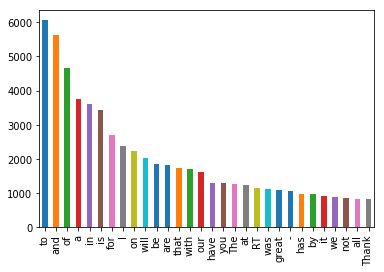

In [83]:
listofwords=pd.Series(listofwords)
top_words=listofwords.value_counts()
top_words_percent= top_words/len(listofwords)
top_words.head(30).plot.bar()
# top_words.head(50)

In [120]:
cleaned_text=listofwords.str.cat(sep=' ')
selected=top_words[400:600]
testin=selected.to_dict(dict)
type(testin)
testin

{'#AmericaFirst': 56,
 '#BigLeagueTruth': 48,
 '#DrainTheSwamp': 51,
 '#Trump2016[URL]': 49,
 '#VoteTrump': 48,
 '2nd': 53,
 '@EricTrump:': 47,
 '@Scavino45:': 59,
 '@WhiteHouse': 51,
 '@WhiteHouse:': 69,
 '@foxandfriends:': 55,
 '@megynkelly': 47,
 'A.M.': 51,
 'AND': 57,
 'After': 67,
 'Also,': 54,
 'America!': 58,
 'And': 47,
 'Andrew': 47,
 'Bernie': 69,
 'Bob': 46,
 'Border,': 54,
 'Border.': 48,
 'CNN': 62,
 'Chuck': 53,
 'Collusion': 56,
 'Congressman': 62,
 'Country.': 48,
 'Court': 59,
 'Crime,': 58,
 'D.C.': 62,
 'Democrats,': 49,
 'Election': 56,
 'Endorsement!': 69,
 'FAKE': 68,
 'Florida.': 46,
 'For': 64,
 'God': 51,
 'Good': 47,
 'Heading': 60,
 'How': 61,
 'ISIS': 62,
 'Iran': 53,
 'Is': 51,
 'Kim': 58,
 'Law': 49,
 'Look': 68,
 'Make': 47,
 'Market': 57,
 'Melania': 63,
 'Michael': 54,
 'Mike': 52,
 'Military,': 54,
 'NO': 57,
 'ObamaCare': 61,
 'Ohio': 59,
 'Rubio': 55,
 'Russia,': 47,
 'Secretary': 69,
 'See': 59,
 'Stock': 62,
 'Strong': 57,
 'Supreme': 68,
 'These'

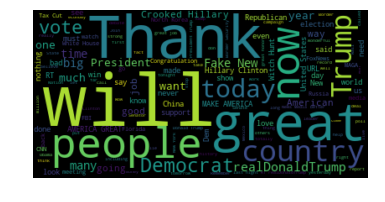

In [121]:
# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(cleaned_text)
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(testin)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [9]:
import re
caps=[]
for word in listofwords:
    caps.append([i[0] for i in re.findall('(([A-Z])(?![a-z]))', word)])
newlist=[]
for lists in caps:
    if lists!=[]:
        newlist.append(lists)
strings=[]
for lists in newlist:
    strings.append(''.join(lists))

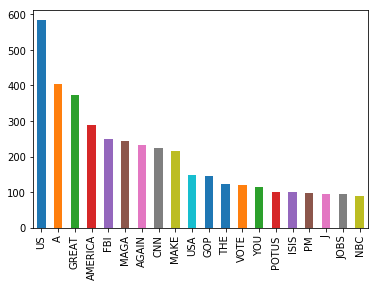

In [10]:
strings=pd.Series(strings)
top_cap_words=strings.value_counts()
top_cap_words=top_cap_words.drop(['URL', 'I', 'RT'])
top_cap_words.head(20).plot.bar()

In [12]:
tweet_text.head()

0          PAY TO PLAY POLITICS. #CrookedHillary [URL]
1    Very little pick-up by the dishonest media of ...
2    Crooked Hillary Clinton likes to talk about th...
3    Thank you Florida- a MOVEMENT that has never b...
4    Join me Thursday in Florida &amp; Ohio!West Pa...
Name: TEXT, dtype: object

In [17]:
total_chars=len(tweet_text_all)
total_chars
total_wordz=len((tweet_text_all.split()))
total_wordz

250988

In [13]:
chars = set(tweet_text_all)
words = set(tweet_text_all.split())
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 32293
total number of unique chars 369


In [14]:
words=list(words)

In [15]:
#replace apostrophes in dictionary keys 
for i in range (len(words)):
    words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')